### The Dataset

We have 100 handpicked images of spoons in 3 different materials, plastic, metal, and wood. The images are taken by phone and has different background, lighting, image size, and angle.

We will use the dataset to train a model to detect the material of the spoon.

Model ini menggunakan dataset 100 gambar sendok yang diambil secara manual. Dataset gambar terdiri dari sendok metal, kayu, dan plastik. Gambar tersebut mempunyai background, lighting, sudut pandang, dan ukuran gambar. Karena background dari gambar dataset yang diambil berbeda-beda, maka pemilihan background dapat mempengaruhi akurasi model.

### Step 1 : Buat template data generator

Data augmenting atau generation berfungsi untuk menambah jumlah dataset dengan membuat data gambar baru dari data asli yang diubah (dizoom, digeser, atau diputar). Hal ini berfungsi agar model yang dibuat memiliki data yang cukup agar akurasi dapat bertambah.

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image as image_utils

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',)

test_datagen = ImageDataGenerator(
    rescale=1./255)

### Step 2 : muat dataset dan masukkan ke data generator

Kita akan memuat dataset ke program, dan kita akan menambahkan dataset ke data generator
Dataset dibagi menjadi 3 tipe,
 - **train** berfungsi untuk melatih parameter awal yang digunakan oleh model
 - **valid** befungsi untuk memvalidasi model yang di training dan mengubah parameter berdasarkan hasil validasi
 - **test** berfungsi untuk mengevaluasi hasil akhir model terhadap gambar yang baru 

In [1]:
train_generator = train_datagen.flow_from_directory(
    'data/train', 
    target_size=(256, 256), 
    batch_size=32, 
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    'data/valid', 
    target_size=(256, 256), 
    batch_size=32, 
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    'data/test', 
    target_size=(256, 256), 
    batch_size=32, 
    class_mode='categorical')

### Step 3 : buat model pelatihan data

untuk melatih model ini, kita menggunakan sistem sequential yang berarti semua layer akan dijelajahi secara urut dari atas ke bawah

berikut penjelasan masing-masing layer:  
- conv2d, berguna untuk men-scan gambar menggunakan matriks 3x3 untuk menemukan sebuah pola atau fitur dari gambar
- maxpooling2d, berguna untuk mengambil nilai terbesar dari suatu set matriks dan menggabungkannya dengan matriks lainnya
- flatten, berguna untuk mengubah nilai gambar dari matriks berukuran 256x256 menjadi sebuah list
- Dense, adalah sistem neural network dengan jumlah node 512. Layer dense yang terakhir berfungsi sebagai jumlah output, yaitu 3, sesuai dengan kategori prediksi

In [3]:
from keras.models import Sequential
from keras import layers

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 1, activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(64, 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(512, 1, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### step 5 : lakukan proses pelatihan data 40 siklus (epoch)

kita akan melatih model kita sebanyak 40 siklus. semakin banyak siklus, semakin meningkat akurasinya, namun batas akurasi ditentukan oleh banyak faktor lain seperti model data, jumlah data, dan kualitas data

In [4]:
history = model.fit_generator(train_generator, epochs=40, validation_data=validation_generator)

Found 119 images belonging to 3 classes.
Found 21 images belonging to 3 classes.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14976\2883434223.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=40, validation_data=validation_generator)


Epoch 1/40
4/4 [==============================] - 23s 6s/step - loss: 1.3598 - accuracy: 0.6555 - val_loss: 0.4234 - val_accuracy: 0.7619
Epoch 2/40
4/4 [==============================] - 20s 5s/step - loss: 0.4151 - accuracy: 0.7479 - val_loss: 0.3682 - val_accuracy: 0.8571
Epoch 3/40
4/4 [==============================] - 20s 5s/step - loss: 0.3508 - accuracy: 0.8067 - val_loss: 0.3711 - val_accuracy: 0.7619
Epoch 4/40
4/4 [==============================] - 20s 5s/step - loss: 0.2879 - accuracy: 0.8655 - val_loss: 0.3608 - val_accuracy: 0.8095
Epoch 5/40
4/4 [==============================] - 20s 5s/step - loss: 0.2324 - accuracy: 0.8739 - val_loss: 0.3416 - val_accuracy: 0.7619
Epoch 6/40
4/4 [==============================] - 20s 5s/step - loss: 0.3350 - accuracy: 0.8235 - val_loss: 0.2493 - val_accuracy: 0.8571
Epoch 7/40
4/4 [==============================] - 19s 4s/step - loss: 0.2715 - accuracy: 0.8487 - val_loss: 0.2229 - val_accuracy: 0.8571
Epoch 8/40
4/4 [==================

#### compile the model

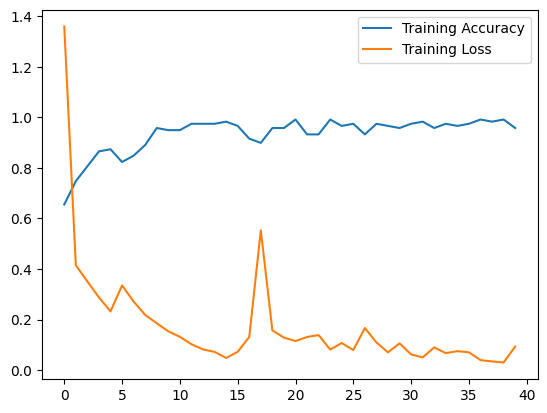

In [5]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.plot(acc, label='Training Accuracy')
plt.plot(loss, label='Training Loss')
plt.legend()
plt.show()

In [8]:
test_generator = test_datagen.flow_from_directory('data/test', target_size=(256,256), batch_size=32, class_mode='categorical')

model.evaluate(test_generator)

model.save('model_materialdetection_fifthiteration.h5')

Found 6 images belonging to 3 classes.
1/1 [==============================] - 0s 415ms/step - loss: 0.0209 - accuracy: 1.0000


[0.02085624448955059, 1.0]

### Step 6 : gunakan model untuk memprediksi gambar 

(256, 256, 3)
1/1 [==============================] - 0s 324ms/step
[[9.1473134e-07 9.9999905e-01 1.5114818e-08]]
Plastic, certainty 100.0 %


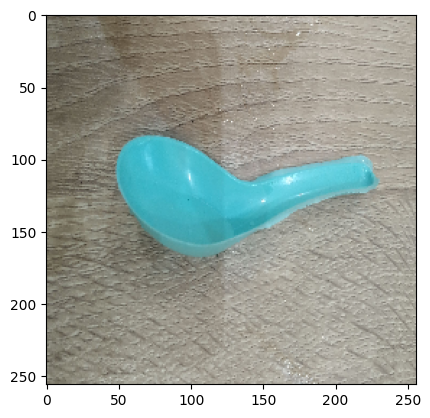

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

loaded_model = tf.keras.models.load_model('model_materialdetection_fifthiteration.h5')
img = tf.keras.preprocessing.image.load_img('sendok4.jpg', target_size=(256, 256,3))
img = tf.keras.preprocessing.image.img_to_array(img)
img = img / 255.0
print(img.shape)
plt.imshow(img)

prediction = loaded_model.predict(np.array([img]))
print(prediction)
finalresult = np.argmax(prediction[0])
if finalresult == 0:
    print(f"Metal, certainty {round((prediction[0][0] * 100),3)} %")
elif finalresult == 1:
    print(f"Plastic, certainty {round((prediction[0][1] * 100),3)} %")
elif finalresult == 2:
    print(f"Wood, certainty {round((prediction[0][2] * 100),3)} %")
